In [ ]:
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.losses import mean_absolute_percentage_error
from keras.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def NNAR(data, ratio, title):
    # Chuyển đổi cột ngày sang định dạng datetime
    data['Date'] = pd.to_datetime(data['Date'])

    # Chia tập dữ liệu thành train, validate và test theo tỉ lệ 60-25-15
    train_size = int(len(data) * ratio)
    train_data = data[:train_size]
    test_data = data[train_size:]

    # Chuẩn bị dữ liệu
    def prepare_data(data, window_size, forecast_size):
        X, y = [], []
        for i in range(window_size, len(data)-forecast_size+1):
            X.append(data[i-window_size:i, 0])
            y.append(data[i:i+forecast_size, 0])
        return np.array(X), np.array(y)

    # Chuẩn bị dữ liệu đầu vào cho mô hình dự đoán
    window_size = 10
    forecast_size = 1

    X_train, y_train = prepare_data(train_data.loc[:, ['Close']].values, window_size, forecast_size)
    X_test, y_test = prepare_data(test_data.loc[:, ['Close']].values, window_size, forecast_size)

    model = build_nnar_model(window_size, 1, 8)

    # Huấn luyện mô hình NNAR
    model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1]*1), y_train, epochs=50, batch_size=32, verbose=1)

    # Dự đoán giá trị đầu ra tiếp theo và chuyển đổi kết quả dự đoán từ dạng chuẩn hóa về dạng gốc
    y_pred = model.predict(X_test)

    # Tính toán RMSE trên kết quả dự đoán và giá trị thực tế
    mse = mean_squared_error(y_test, y_pred, squared=False)
    rmse = np.sqrt(mse)
    # In ra giá trị RMSE
    print("RMSE:", rmse)

    mape = mean_absolute_percentage_error(y_test, y_pred)
    mape_mean = np.mean(mape)
    print('MAPE:', mape_mean)

    mae = mean_absolute_error(y_test, y_pred)
    mae_mean = np.mean(mae)
    print('MAE:', mae_mean)

    # Vẽ biểu đồ cho dữ liệu thực tế và dự đoán
    plt.plot(y_test, label='Thực tế')
    plt.plot(y_pred, label='Dự đoán')
    plt.xlabel('Thời gian')
    plt.ylabel('Giá')
    plt.title(title)
    plt.legend()
    plt.show()

# Xây dựng và biên dịch mô hình NNAR
def build_nnar_model(n_lags, n_features, n_neurons):
    model = Sequential()

    # add a dense layer with n_neurons neurons and input_shape = (n_lags * n_features,)
    model.add(Dense(n_neurons, input_shape=(n_lags * n_features,), activation='relu'))

    # add a series of dense layers with decreasing number of neurons
    for i in range(2):
        model.add(Dense(n_neurons//(2**i), activation='relu'))

    # add a dense layer with 1 neuron to output the forecast
    model.add(Dense(1))

    # compile the model with mean squared error loss and the adam optimizer
    model.compile(loss='mse', optimizer='adam')

    return model


Epoch 1/50
273/273 [==============================] - 5s 6ms/step - loss: 366.2098
Epoch 2/50
273/273 [==============================] - 1s 4ms/step - loss: 0.9191
Epoch 3/50
273/273 [==============================] - 1s 5ms/step - loss: 0.9059
Epoch 4/50
273/273 [==============================] - 1s 4ms/step - loss: 0.8994
Epoch 5/50
273/273 [==============================] - 1s 5ms/step - loss: 0.8930
Epoch 6/50
273/273 [==============================] - 1s 5ms/step - loss: 0.8679
Epoch 7/50
273/273 [==============================] - 1s 5ms/step - loss: 0.8654
Epoch 8/50
273/273 [==============================] - 1s 5ms/step - loss: 0.8516
Epoch 9/50
273/273 [==============================] - 2s 7ms/step - loss: 0.8453
Epoch 10/50
273/273 [==============================] - 2s 6ms/step - loss: 0.8238
Epoch 11/50
273/273 [==============================] - 1s 5ms/step - loss: 0.7984
Epoch 12/50
273/273 [==============================] - 1s 5ms/step - loss: 0.7955
Epoch 13/50
273/273 [==

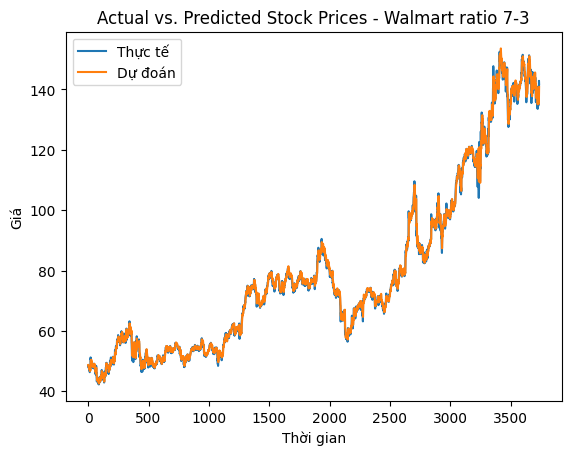

In [ ]:
# Load data
data_wal = pd.read_csv('https://raw.githubusercontent.com/minknhom/dataset/main/walmart_stock_price.csv')
data_fb = pd.read_csv('https://raw.githubusercontent.com/minknhom/dataset/main/FB.csv')

wal_73 = NNAR(data_wal, 0.7, 'Actual vs. Predicted Stock Prices - Walmart ratio 7-3')

Epoch 1/50
312/312 [==============================] - 2s 2ms/step - loss: 219.4304
Epoch 2/50
312/312 [==============================] - 1s 2ms/step - loss: 0.7318
Epoch 3/50
312/312 [==============================] - 1s 3ms/step - loss: 0.7117
Epoch 4/50
312/312 [==============================] - 1s 3ms/step - loss: 0.6931
Epoch 5/50
312/312 [==============================] - 1s 3ms/step - loss: 0.6815
Epoch 6/50
312/312 [==============================] - 1s 2ms/step - loss: 0.6715
Epoch 7/50
312/312 [==============================] - 1s 2ms/step - loss: 0.6510
Epoch 8/50
312/312 [==============================] - 1s 2ms/step - loss: 0.6372
Epoch 9/50
312/312 [==============================] - 1s 2ms/step - loss: 0.6259
Epoch 10/50
312/312 [==============================] - 1s 2ms/step - loss: 0.6151
Epoch 11/50
312/312 [==============================] - 1s 2ms/step - loss: 0.6205
Epoch 12/50
312/312 [==============================] - 1s 2ms/step - loss: 0.5901
Epoch 13/50
312/312 [==

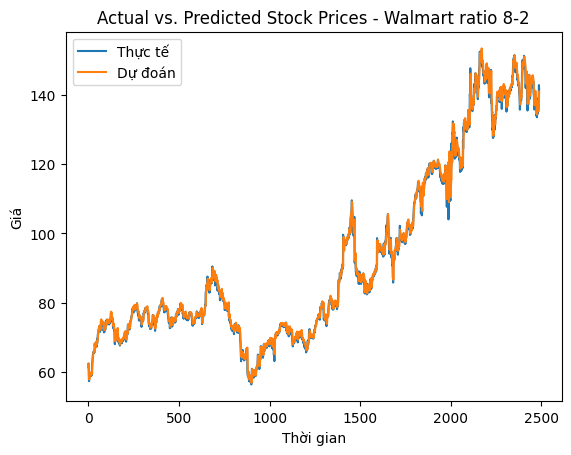

In [ ]:
wal_82 = NNAR(data_wal, 0.8, 'Actual vs. Predicted Stock Prices - Walmart ratio 8-2')

Epoch 1/50
273/273 [==============================] - 1s 2ms/step - loss: 185.8707
Epoch 2/50
273/273 [==============================] - 1s 2ms/step - loss: 0.9985
Epoch 3/50
273/273 [==============================] - 1s 2ms/step - loss: 0.9784
Epoch 4/50
273/273 [==============================] - 1s 2ms/step - loss: 0.9372
Epoch 5/50
273/273 [==============================] - 1s 2ms/step - loss: 0.9110
Epoch 6/50
273/273 [==============================] - 1s 2ms/step - loss: 0.8991
Epoch 7/50
273/273 [==============================] - 1s 2ms/step - loss: 0.8750
Epoch 8/50
273/273 [==============================] - 1s 2ms/step - loss: 0.8220
Epoch 9/50
273/273 [==============================] - 1s 2ms/step - loss: 0.8083
Epoch 10/50
273/273 [==============================] - 1s 2ms/step - loss: 0.8029
Epoch 11/50
273/273 [==============================] - 1s 2ms/step - loss: 0.7421
Epoch 12/50
273/273 [==============================] - 1s 2ms/step - loss: 0.6922
Epoch 13/50
273/273 [==

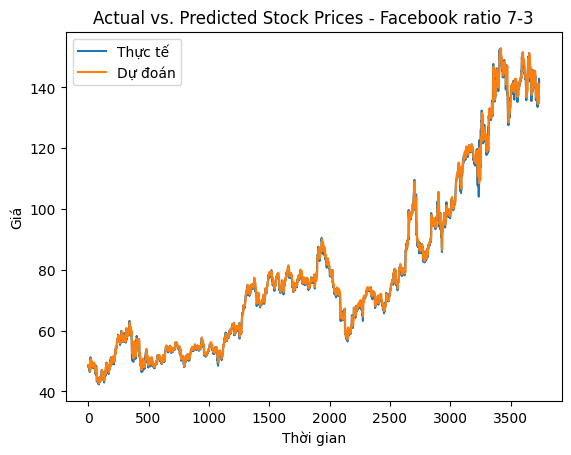

In [ ]:
fb_73 = NNAR(data_wal, 0.7, 'Actual vs. Predicted Stock Prices - Facebook ratio 7-3')

Epoch 1/50
312/312 [==============================] - 1s 2ms/step - loss: 608.8661
Epoch 2/50
312/312 [==============================] - 1s 2ms/step - loss: 1.0180
Epoch 3/50
312/312 [==============================] - 1s 2ms/step - loss: 1.0189
Epoch 4/50
312/312 [==============================] - 1s 2ms/step - loss: 1.0180
Epoch 5/50
312/312 [==============================] - 1s 2ms/step - loss: 1.0129
Epoch 6/50
312/312 [==============================] - 1s 2ms/step - loss: 1.0039
Epoch 7/50
312/312 [==============================] - 1s 3ms/step - loss: 1.0133
Epoch 8/50
312/312 [==============================] - 1s 3ms/step - loss: 1.0132
Epoch 9/50
312/312 [==============================] - 1s 3ms/step - loss: 1.0052
Epoch 10/50
312/312 [==============================] - 1s 2ms/step - loss: 1.0063
Epoch 11/50
312/312 [==============================] - 1s 2ms/step - loss: 0.9967
Epoch 12/50
312/312 [==============================] - 1s 2ms/step - loss: 0.9929
Epoch 13/50
312/312 [==

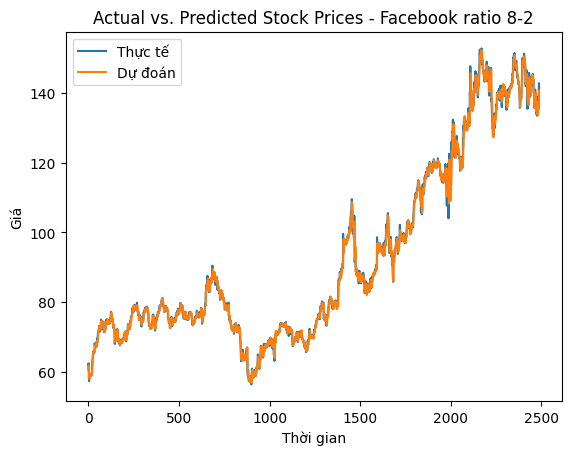

In [ ]:
fb_82 = NNAR(data_wal, 0.8, 'Actual vs. Predicted Stock Prices - Facebook ratio 8-2')